In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('my_first_eye.bmp')
img_array = np.array(img)

def histogram_equalization(img_in):
    
    # ділимо зображення на канали за кольором
    b,g,r = cv2.split(img_in)
    
    # Ф-цією flatten отримуємо копію масиву кожного кольору, зведеного в один вимір.
    # Ф-ція histogram - вбудована ф-ція в numpy для побудови гістограми.
    # Параметрами вона приймає одновимірний масив (для цього ми тут застосували flatten), з якого буде будувати гістограму,
    # кількість стовпців та шкалу.
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256]) 
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
    # Ф-ція cumsum повертає суму елементів вздовж заданої осі  
    # Так ми дізнаємося загальну к-ть пікселів заданого кольору
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
    # маскує кожен стовпець нулем (створює копію, де ми зможемо зберегти нашу нормалізовану гістограму)
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    # нормалізація мінімаксним методом, тут відбувається "розтягування" гістограми. Присвоюється попередньо підготовленій копії
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    # копія "приводиться" у тип піксель(uint8) і заповнюється цими пікселями
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8') 
    
    # розтягує гістограми на весь проміжок
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    cv2.imwrite('my_second_eye.png', equ)
    
    # вертає нормалізовані значення з трьох каналів у одне зображення
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
    img_b = cdf_final_b[b]
    img_out = cv2.merge((img_b, img_g, img_r))
    
    return img_out

def show_histogram(img_array, title):
    fig, ax = plt.subplots(3, sharex=True)
    
    channels = ['red', 'green', 'blue']
    for i in range(3):
        ax[i].hist(img_array[:, :, i].flatten(), 255, (0, 255), color=channels[i])
        
    #plt.show()
    plt.savefig(f'histogram{title}.png')
    
# def edited_histogram(img_array):
#     fig, ax = plt.subplots(3, sharex=True)
    
#     channels = ['red', 'green', 'blue']
#     for i in range(3):
#         ax[i].hist(img_array[:, :, i].flatten(), 255, (0, 255), color=channels[i])
#         for j, axes in enumerate(ax.flat):
#             if axes==0:
#                 axes=(((axes-1)+(axes+1))/2)
    
#     #plt.show()
#     plt.savefig('histogram_edited.png')

my_hist = histogram_equalization(img_array)
show_histogram(img_array, '_first')
show_histogram(my_hist, '_second')

# edited_histogram(my_hist)

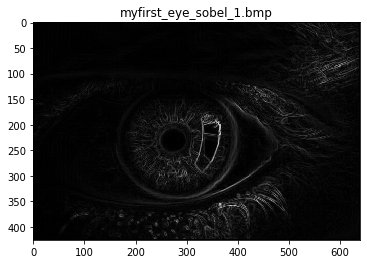

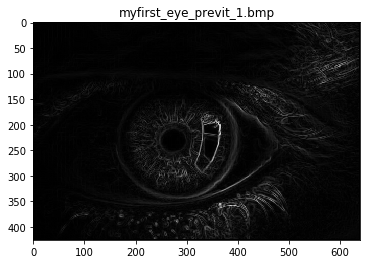

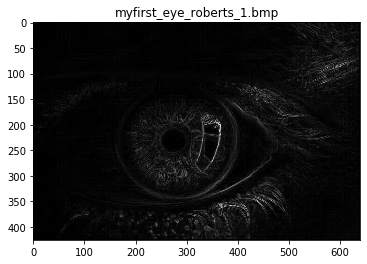

In [41]:
from PIL import Image

def apply_operator(filename, operator, title):
    img = np.array(Image.open(filename)).astype(np.uint8)
    # print(img)

    size = img.shape
    
    if(operator == 'sobel'):
        horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
        vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])     
        
    elif(operator == 'previt'):
        horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  
        vertical = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  
        
    elif(operator == 'roberts'):
        horizontal = np.array([[0, 1], [-1, 0]])  
        vertical = np.array([[-1, 0], [0, 1]]) 

    else:
        print('incorrect operator name')
        return

    newgradientImage = np.zeros(size)

    if(operator == 'sobel' or operator == 'previt'): 
        for channel in range(size[2]):
            for i in range(1, size[0] - 1):
                for j in range(1, size[1] - 1):
                    horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                                     (horizontal[0, 1] * img[i - 1, j, channel]) + \
                                     (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                                     (horizontal[1, 0] * img[i, j - 1, channel]) + \
                                     (horizontal[1, 1] * img[i, j, channel]) + \
                                     (horizontal[1, 2] * img[i, j + 1, channel]) + \
                                     (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                                     (horizontal[2, 1] * img[i + 1, j, channel]) + \
                                     (horizontal[2, 2] * img[i + 1, j + 1, channel])

                    verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                                   (vertical[0, 1] * img[i - 1, j, channel]) + \
                                   (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                                   (vertical[1, 0] * img[i, j - 1, channel]) + \
                                   (vertical[1, 1] * img[i, j, channel]) + \
                                   (vertical[1, 2] * img[i, j + 1, channel]) + \
                                   (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                                   (vertical[2, 1] * img[i + 1, j, channel]) + \
                                   (vertical[2, 2] * img[i + 1, j + 1, channel])

                    mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
                    newgradientImage[i - 1, j - 1, channel] = mag                
                
    elif(operator == 'roberts'):
        for channel in range(size[2]):
            for i in range(1, size[0] - 1):
                for j in range(1, size[1] - 1):
                    horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) 

                    verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                                   (vertical[0, 1] * img[i - 1, j, channel]) + \
                                   (vertical[1, 0] * img[i, j - 1, channel]) + \
                                   (vertical[1, 1] * img[i, j, channel])

                    mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
                    newgradientImage[i - 1, j - 1, channel] = mag

    rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]

    plt.figure()
    plt.title(f'my{title}_eye_{operator}_1.bmp')
    plt.imsave(f'my{title}_eye_{operator}_1.bmp', rgb_edge, cmap='gray', format='bmp')
    plt.imshow(rgb_edge, cmap='gray')
    plt.show()
    
apply_operator('my_small_first_eye.bmp', 'sobel', 'first')
apply_operator('my_small_first_eye.bmp', 'previt', 'first')
apply_operator('my_small_first_eye.bmp', 'roberts', 'first')

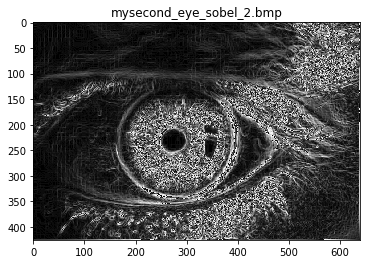

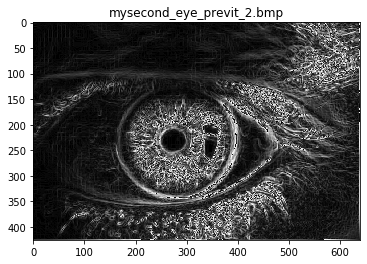

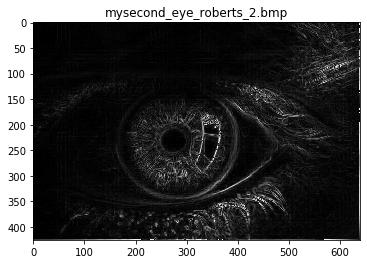

In [42]:
from PIL import Image

def apply_operator(filename, operator, title):
    img = np.array(Image.open(filename)).astype(np.uint8)
    # print(img)

    size = img.shape
    
    if(operator == 'sobel'):
        horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
        vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])     
        
    elif(operator == 'previt'):
        horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  
        vertical = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  
        
    elif(operator == 'roberts'):
        horizontal = np.array([[0, 1], [-1, 0]])  
        vertical = np.array([[-1, 0], [0, 1]]) 

    else:
        print('incorrect operator name')
        return

    if(operator == 'sobel' or operator == 'previt'): 
        for channel in range(size[2]):
            for i in range(1, size[0] - 1):
                for j in range(1, size[1] - 1):
                    horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                                     (horizontal[0, 1] * img[i - 1, j, channel]) + \
                                     (horizontal[0, 2] * img[i - 1, j + 1, channel]) + \
                                     (horizontal[1, 0] * img[i, j - 1, channel]) + \
                                     (horizontal[1, 1] * img[i, j, channel]) + \
                                     (horizontal[1, 2] * img[i, j + 1, channel]) + \
                                     (horizontal[2, 0] * img[i + 1, j - 1, channel]) + \
                                     (horizontal[2, 1] * img[i + 1, j, channel]) + \
                                     (horizontal[2, 2] * img[i + 1, j + 1, channel])

                    verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                                   (vertical[0, 1] * img[i - 1, j, channel]) + \
                                   (vertical[0, 2] * img[i - 1, j + 1, channel]) + \
                                   (vertical[1, 0] * img[i, j - 1, channel]) + \
                                   (vertical[1, 1] * img[i, j, channel]) + \
                                   (vertical[1, 2] * img[i, j + 1, channel]) + \
                                   (vertical[2, 0] * img[i + 1, j - 1, channel]) + \
                                   (vertical[2, 1] * img[i + 1, j, channel]) + \
                                   (vertical[2, 2] * img[i + 1, j + 1, channel])

                    mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
                    img[i - 1, j - 1, channel] = mag
                
                
    elif(operator == 'roberts'):
        for channel in range(size[2]):
            for i in range(1, size[0] - 1):
                for j in range(1, size[1] - 1):
                    horizontalGrad = (horizontal[0, 0] * img[i - 1, j - 1, channel]) + \
                             (horizontal[0, 1] * img[i - 1, j, channel]) + \
                             (horizontal[1, 0] * img[i, j - 1, channel]) + \
                             (horizontal[1, 1] * img[i, j, channel]) 

                    verticalGrad = (vertical[0, 0] * img[i - 1, j - 1, channel]) + \
                                   (vertical[0, 1] * img[i - 1, j, channel]) + \
                                   (vertical[1, 0] * img[i, j - 1, channel]) + \
                                   (vertical[1, 1] * img[i, j, channel])

                    mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
                    img[i - 1, j - 1, channel] = mag

    rgb_edge = img[:,:,0] + img[:,:,1] + img[:,:,2]

    plt.figure()
    plt.title(f'my{title}_eye_{operator}_2.bmp')
    plt.imsave(f'my{title}_eye_{operator}_2.bmp', rgb_edge, cmap='gray', format='bmp')
    plt.imshow(rgb_edge, cmap='gray')
    plt.show()
    
apply_operator('my_small_first_eye.bmp', 'sobel', 'second')
apply_operator('my_small_first_eye.bmp', 'previt', 'second')
apply_operator('my_small_first_eye.bmp', 'roberts', 'second')